# Tasks for section D

In [2]:
%matplotlib inline

import geopandas
from pysal.lib import examples
import seaborn as sns
import pandas as pd
from pysal.viz import mapclassify
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lsoas = geopandas.read_file("data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")

In [4]:
ahah_data = pd.read_csv("data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/tables/E08000012.csv")

In [5]:
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")

In [6]:
ahah.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lsoa11cd      298 non-null    object  
 1   geometry      298 non-null    geometry
 2   lsoa11nm      298 non-null    object  
 3   r_rank        298 non-null    int64   
 4   h_rank        298 non-null    int64   
 5   g_rank        298 non-null    int64   
 6   e_rank        298 non-null    int64   
 7   r_exp         298 non-null    float64 
 8   h_exp         298 non-null    float64 
 9   g_exp         298 non-null    float64 
 10  e_exp         298 non-null    float64 
 11  ahah          298 non-null    float64 
 12  r_ahah        298 non-null    int64   
 13  d_ahah        298 non-null    int64   
 14  r_dec         298 non-null    int64   
 15  h_dec         298 non-null    int64   
 16  g_dec         298 non-null    int64   
 17  e_dec         298 non-null    int64   
 18  gp

In [7]:
ahah.ahah.describe()

count    298.000000
mean      25.423092
std        6.378593
min       14.861336
25%       20.582157
50%       24.287770
75%       29.605299
max       48.067407
Name: ahah, dtype: float64

# Task 1: AHAH choropleths

Create the following choropleths and, where possible, complement them with a figure that displays the distribution of values using a KDE:

* Equal Interval with five classes
* Quantiles with five classes
* Fisher-Jenks with five classes
* Unique Values with the following setup:
    - Split the LSOAs in two classes: above and below the average AHAH score
    - Assign a qualitative label (above or below) to each LSOA
    - Create a unique value map for the labels you have just created


## Equal Interval with five classes

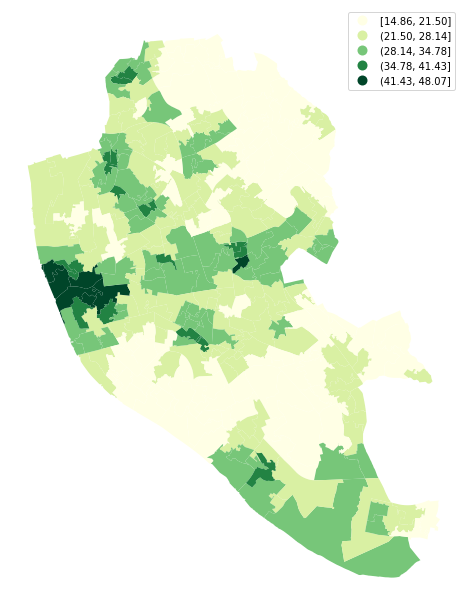

In [8]:
ax = ahah.plot(column="ahah", 
        scheme="equal_interval", 
        k=5,
        cmap="YlGn",
        legend=True,
        figsize=(10, 11)
       )

ax.set_axis_off()

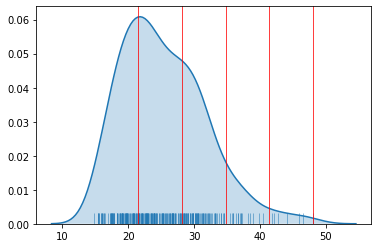

In [9]:
classi = mapclassify.EqualInterval(ahah["ahah"], k=5)

# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], shade=True, legend=False)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

Reflection: Because this is an Equal Interval map and the AHAH distribution over LSOAs is somewhat skewed (with a thicker right tail), we have many neighborhoods that fall into the first 2–3 bins. The fourth and fifth bin (with the darker shade) are comprised of much fewer neighborhoods.

## Quantiles with five classes

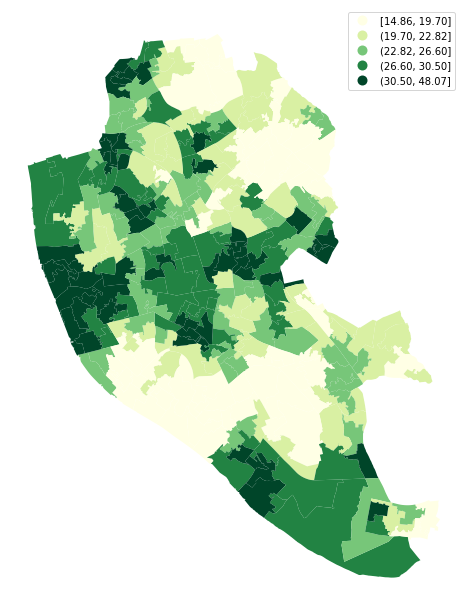

In [10]:
ax = ahah.plot(column="ahah", 
        scheme="quantiles", 
        k=5,
        cmap="YlGn",
        legend=True,
        figsize=(10, 11)
       )
ax.set_axis_off()

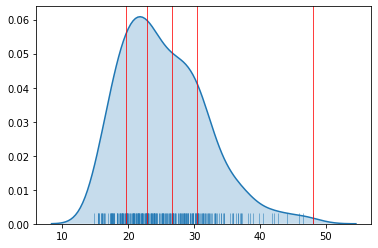

In [11]:
classi = mapclassify.Quantiles(ahah["ahah"], k=5)

# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], shade=True, legend=False)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

Reflection: Compared to the Equal Interval map, the Quantile map splits the data into bins based on the rank of the values instead of the actual values. That means that there is an equal number of observations within each bin. In the Equal Interval map, the top and bottom of the distribution were outlined in detail, whereas here, the top bin captures a large chunck of the distribution. On the other hand, the most dense part of the distribution is now more finely split (in this case, taking four bins instead of three).

## Fisher-Jenks with five classes

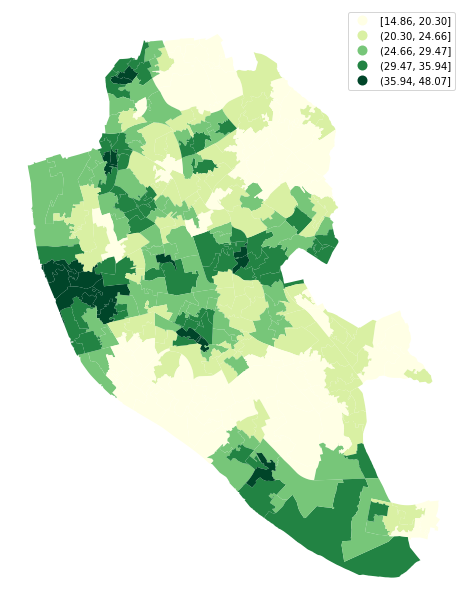

In [12]:
ax = ahah.plot(column="ahah", 
        scheme="fisher_jenks", 
        k=5,
        cmap="YlGn",
        legend=True,
        figsize=(10, 11)
       )
ax.set_axis_off()

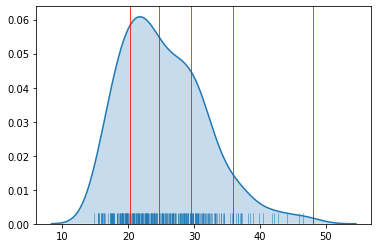

In [13]:
classi = mapclassify.FisherJenks(ahah["ahah"], k=5)

# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], shade=True, legend=False)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

Reflection: The Fisher-Jenks classification splits the data into bins such as to minimize the variance within each bin. In this case, visually, the Fisher-Jenks map lies somewhere between the Equal Interval map (based on observation value) and the Quantile map (based on observation rank).

## Unique Values

Setup:

LSOAs split in two classes: above and below the average AHAH score. Qualitative label (above or below) assigned to each LSOA. Unique value map for the labels.

In [14]:
print(f"Average AHAH is {ahah['ahah'].mean():.2f}")

Average AHAH is 25.42


In [15]:
ahah['above_avg_ahah']= ahah['ahah'] > ahah['ahah'].mean()

In [16]:
ahah[['above_avg_ahah','ahah']].groupby('above_avg_ahah').describe()

ahah                                                        \
                count       mean       std        min        25%        50%   
above_avg_ahah                                                                
False           165.0  20.774152  2.728697  14.861336  18.734410  20.914895   
True            133.0  31.190575  4.664977  25.539157  27.920813  30.171299   

                                      
                      75%        max  
above_avg_ahah                        
False           22.918472  25.396066  
True            33.221349  48.067407

In [17]:
ahah['label_name'] = pd.DataFrame(np.where(ahah['above_avg_ahah'] == 1, "Above", "Below"))

In [18]:
ahah[['label_name','ahah']].groupby('label_name').describe()

ahah                                                        \
            count       mean       std        min        25%        50%   
label_name                                                                
Above       133.0  31.190575  4.664977  25.539157  27.920813  30.171299   
Below       165.0  20.774152  2.728697  14.861336  18.734410  20.914895   

                                  
                  75%        max  
label_name                        
Above       33.221349  48.067407  
Below       22.918472  25.396066

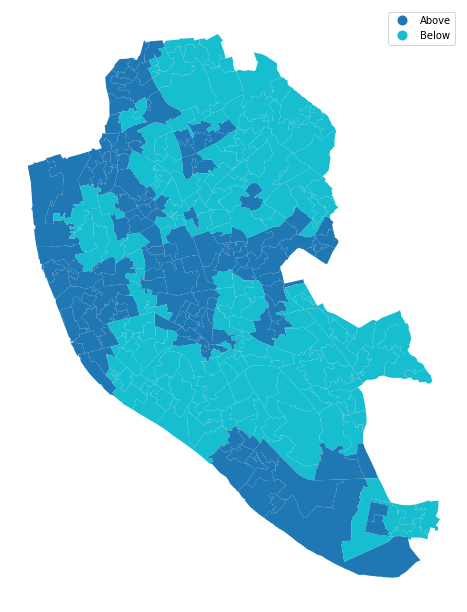

In [19]:
ax = ahah.plot(column="label_name", 
        categorical=True, 
        legend=True,
        figsize=(10, 11)
       )

ax.set_axis_off()

# Task 2: Zoom maps

Generate the following maps:

* Zoom of the city centre of Liverpool with the same color for every LSOA
* Quantile map of AHAH for all of Liverpool, zoomed into north of the city centre
* Zoom to north of the city centre with a quantile map of AHAH for the section only

### Zoom-in of Liverpool City Centre

(333000.0, 339000.0)

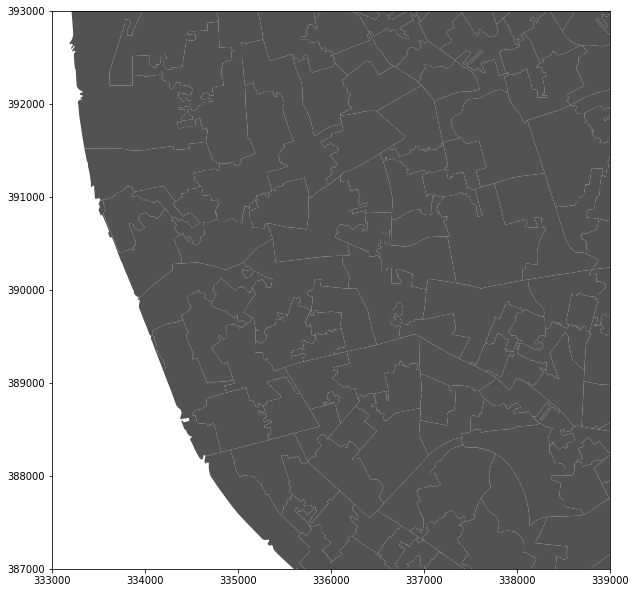

In [20]:
# Setup the figure
f, ax = plt.subplots(1,
        figsize=(10, 11))
# Draw the choropleth
ahah.plot(color="#525252",
        legend=False,
        ax=ax
       )
# Redimensionate X and Y axes to Liverpool City Centre
# Coordinates are a guess...
ax.set_ylim(387000, 393000)
ax.set_xlim(333000, 339000)

### Quantile regression for all of Liverpool; Zoom-in on City Centre

(333000.0, 339000.0)

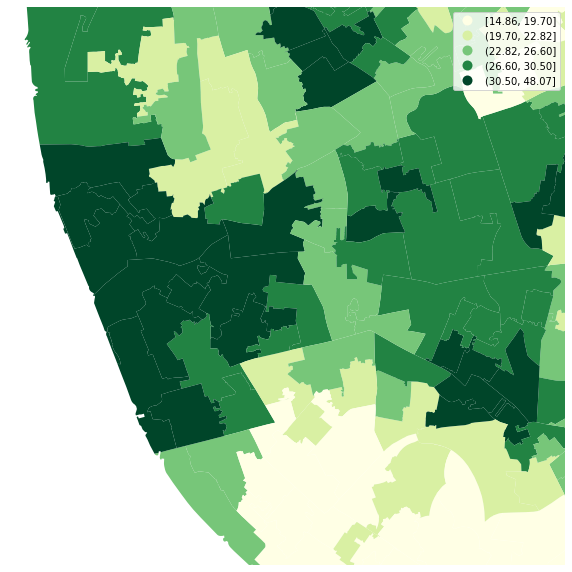

In [21]:
ax = ahah.plot(column="ahah", 
        scheme="quantiles", 
        k=5,
        cmap="YlGn",
        legend=True,
        figsize=(10, 11)
       )
ax.set_axis_off()
ax.set_ylim(387000, 393000)
ax.set_xlim(333000, 339000)

### North of the City Centre with quantile map of AHAH for the section only

<AxesSubplot:>

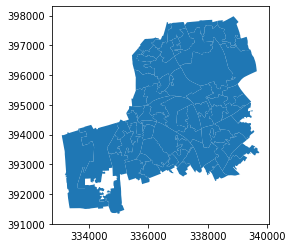

In [22]:
subset_ahah = ahah.cx[333000:339000, 393000:]
subset_ahah.plot()

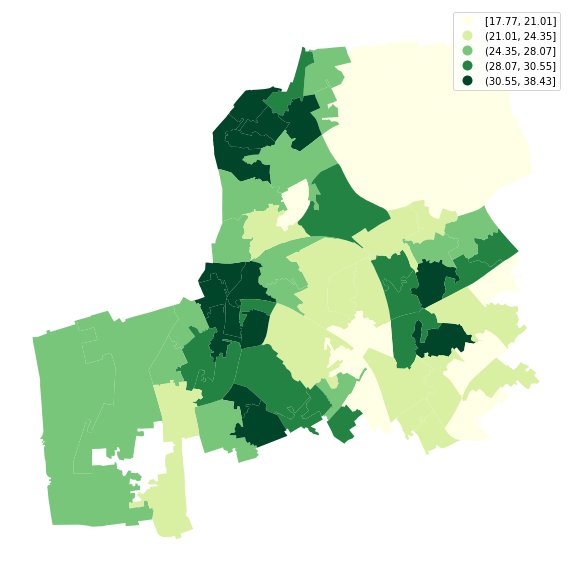

In [23]:
ax = subset_ahah.plot(column="ahah", 
        scheme="quantiles", 
        k=5,
        cmap="YlGn",
        legend=True,
        figsize=(10, 11)
       )
ax.set_axis_off()